In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_whisper_tiny = pd.read_csv('processed_evaluation/processed_Whisper_tiny_evaluation.csv', index_col=0)
df_cleaned_whisper_tiny = pd.read_csv('processed_evaluation/processed_Whisper_tiny_cleaned_evaluation.csv', index_col=0)
df_whisper_large = pd.read_csv('processed_evaluation/processed_Whisper_large_evaluation.csv', index_col=0)
df_cleaned_whisper_large = pd.read_csv('processed_evaluation/processed_Whisper_large_cleaned_evaluation.csv', index_col=0)
df_googlecloud = pd.read_csv('processed_evaluation/processed_GoogleCloud_evaluation.csv', index_col=0)
df_cleaned_googlecloud = pd.read_csv('processed_evaluation/processed_GoogleCloud_cleaned_evaluation.csv', index_col=0)
df_wav2vec = pd.read_csv('processed_evaluation/processed_Wav2vec_evaluation.csv', index_col=0)
df_cleaned_wav2vec = pd.read_csv('processed_evaluation/processed_Wav2vec_cleaned_evaluation.csv', index_col=0)
df_wenet = pd.read_csv('processed_evaluation/processed_WeNet_evaluation.csv', index_col=0)
df_cleaned_wenet = pd.read_csv('processed_evaluation/processed_WeNet_cleaned_evaluation.csv', index_col=0)
df_azure = pd.read_csv('processed_evaluation/processed_Azure_evaluation.csv', index_col=0)
df_cleaned_azure = pd.read_csv('processed_evaluation/processed_Azure_cleaned_evaluation.csv', index_col=0)
dict_whisper_tinys = {}
dict_cleaned_whisper_tinys = {}
dict_whisper_larges = {}
dict_cleaned_whisper_larges = {}
dict_googleclouds = {}
dict_cleaned_googleclouds = {}
dict_wav2vecs = {}
dict_cleaned_wav2vecs = {}
dict_wenets = {}
dict_cleaned_wenets = {}
dict_azures = {}
dict_cleaned_azures = {}

modelnames = ['Whisper_tiny', 'Whisper_large', 'GoogleCloud', 'Wav2vec', 'WeNet', 'Azure']
eval_metrics = ['WER', 'CER', 'BLEU', 'WordNet_first', 'WordNet_all', 'GloVe', 'BERT', 'Sent2Vec']
dfs = [df_whisper_tiny, df_whisper_large, df_googlecloud, df_wav2vec, df_wenet, df_azure]
dfs_cleaned = [df_cleaned_whisper_tiny, df_cleaned_whisper_large, df_cleaned_googlecloud, df_cleaned_wav2vec, df_cleaned_wenet, df_cleaned_azure]
dicts = [dict_whisper_tinys, dict_whisper_larges, dict_googleclouds, dict_wav2vecs, dict_wenets, dict_azures]
dicts_cleaned = [dict_cleaned_whisper_tinys, dict_cleaned_whisper_larges, dict_cleaned_googleclouds, dict_cleaned_wav2vecs, dict_cleaned_wenets, dict_cleaned_azures]
stutter_types = ['wr', 'r', 'b', 'p', 'i']
indices = {'wr': list, 'r': list, 'b': list, 'p': list, 'i': list}

wr • []: Word-level repetition. Repeated words or phrases.<br>
r • /r: sound repetition. Repeated sounds, such as a consonant or vowel, that do not constitute an entire word.<br>
b • /b: blocks. Prolonged blocks or unnatural silence.<br>
p • /p: prolongation. Prolonged phonemes.<br>
i • /i: interjection. Excessive utterances like ’嗯’ (hmm), ’啊’ (ah), or ’呃’ (um).

In [3]:
indices['wr'] = df_whisper_tiny[df_whisper_tiny['ground_truth'].str.contains('\[')].index.tolist()
indices['r'] = df_whisper_tiny[df_whisper_tiny['ground_truth'].str.contains('/r')].index.tolist()
indices['b'] = df_whisper_tiny[df_whisper_tiny['ground_truth'].str.contains('/b')].index.tolist()
indices['p'] = df_whisper_tiny[df_whisper_tiny['ground_truth'].str.contains('/p')].index.tolist()
indices['i'] = df_whisper_tiny[df_whisper_tiny['ground_truth'].str.contains('/i')].index.tolist()

for df, df_cleaned, dic, dic_cleaned in zip(dfs, dfs_cleaned, dicts, dicts_cleaned):
    for stutter_type in stutter_types:
        dic[stutter_type] = df.loc[indices[stutter_type]]
        dic_cleaned[stutter_type] = df_cleaned.loc[indices[stutter_type]]

In [4]:
dict_type_scores = {'wr': [], 'r': [], 'b': [], 'p': [], 'i': []}
dict_cleaned_type_scores = {'wr': [], 'r': [], 'b': [], 'p': [], 'i': []}

for stutter_type in stutter_types:
    for i in range(len(modelnames)):
        dict_type_scores[stutter_type].append(dicts[i][stutter_type][eval_metrics].describe())
        dict_cleaned_type_scores[stutter_type].append(dicts_cleaned[i][stutter_type][eval_metrics].describe())

In [5]:
for key, value in dict_type_scores.items():
    for df, modelname in zip(value, modelnames):
        df.to_csv(f'stutter_types/{modelname}_{key}.csv')

for key, value in dict_cleaned_type_scores.items():
    for df, modelname in zip(value, modelnames):
        df.to_csv(f'stutter_types/{modelname}_cleaned_{key}.csv')

# Plotting

In [6]:
def plot_across_models(statistics_type, eval_metrics, stutter_type):
    '''
    statistics_type: 'count', 'mean', 'std', 'min', '25%', '50%' (median), '75%', 'max'
    eval_metrics: 'WER', 'CER', 'BLEU', 'WordNet_first', 'WordNet_all', 'GloVe', 'BERT', 'Sent2Vec'
    stutter_type: 'wr', 'r', 'b', 'p', 'i'
    '''
    
    list_scores = []
    list_scores_cleaned = []

    for df in dict_type_scores[stutter_type]:
        list_scores.append(df.loc[statistics_type, eval_metrics])

    for df in dict_cleaned_type_scores[stutter_type]:
        list_scores_cleaned.append(df.loc[statistics_type, eval_metrics])

    x = np.arange(len(modelnames))
    width = 0.35

    fig, ax = plt.subplots()

    ax.bar(x-width/2, list_scores, width, label='With Hallucination')
    ax.bar(x+width/2, list_scores_cleaned, width, label='Without Hallucination')

    ax.set_xlabel('Models')
    ax.set_ylabel(f'{statistics_type} {eval_metrics} Scores')
    ax.set_title(f'{statistics_type} {eval_metrics} Scores by model for {stutter_type} stutter type')
    ax.set_xticks(x)
    ax.set_xticklabels(modelnames)
    ax.legend()
    plt.xticks(rotation=45)
    plt.show()

    return list_scores, list_scores_cleaned

def plot_within_model(statistics_type, eval_metrics, modelname):
    '''
    statistics_type: 'count', 'mean', 'std', 'min', '25%', '50%' (median), '75%', 'max'
    eval_metrics: 'WER', 'CER', 'BLEU', 'WordNet_first', 'WordNet_all', 'GloVe', 'BERT', 'Sent2Vec'
    modelname: 'Whisper_tiny', 'Whisper_large', 'GoogleCloud', 'Wav2vec', 'WeNet', 'Azure'
    '''

    modelname_to_order = {'Whisper_tiny': 0, 'Whisper_large': 1, 'GoogleCloud': 2, 'Wav2vec': 3, 'WeNet': 4, 'Azure': 5}
    order = modelname_to_order.get(modelname)

    list_scores = []
    list_scores_cleaned = []

    for df in [value[order] for value in dict_type_scores.values()]:
        list_scores.append(df.loc[statistics_type, eval_metrics])

    for df in [value[order] for value in dict_cleaned_type_scores.values()]:
        list_scores_cleaned.append(df.loc[statistics_type, eval_metrics])

    x = np.arange(len(stutter_types))
    width = 0.35

    fig, ax = plt.subplots()

    ax.bar(x-width/2, list_scores, width, label='With Hallucination')
    ax.bar(x+width/2, list_scores_cleaned, width, label='Without Hallucination')

    ax.set_xlabel('Stutter types')
    ax.set_ylabel(f'{statistics_type} {eval_metrics} Scores')
    ax.set_title(f'{statistics_type} {eval_metrics} Scores by stutter type for {modelname}')
    ax.set_xticks(x)
    ax.set_xticklabels(stutter_types)
    ax.legend()
    plt.show()

    return list_scores, list_scores_cleaned

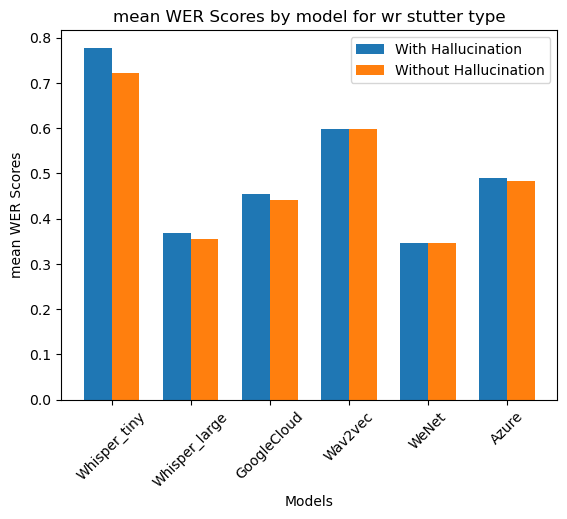

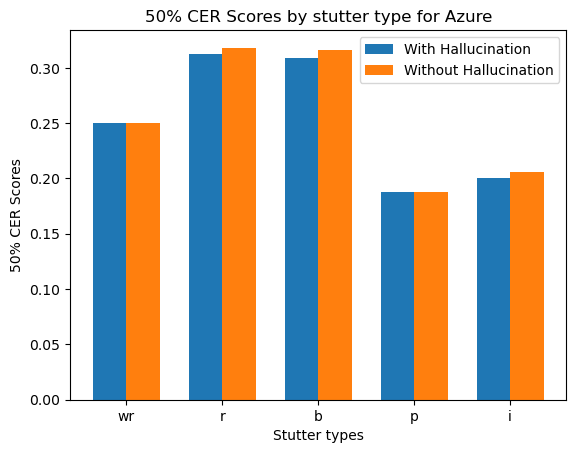

In [7]:
mean_WER_wr, mean_WER_wr_cleaned = plot_across_models('mean', 'WER', 'wr')
median_CER_WeNet, median_CER_WeNet_cleaned = plot_within_model('50%', 'CER', 'Azure')